In [ ]:
# extra code – we've done this type of generation several times before
# np.random.seed(42)
# m = 20
# X = 3 * np.random.rand(m, 1)
# y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = np.loadtxt("hw1x.dat")
y = np.loadtxt("hw1y.dat")

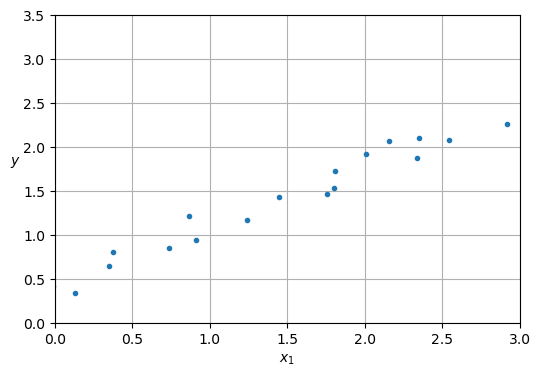

In [3]:

# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

Q2-a

In [4]:
def polynom(x,y):
    A = x.T @ x
    B = x.T @ y
    theta = np.linalg.inv(A) @ B
    return theta

In [5]:
x1 = np.vander(X, N=2, increasing=True)
print(x1.shape)
print(x1[:5])

(100, 2)
[[1.         1.2421431 ]
 [1.         2.3348046 ]
 [1.         0.13264331]
 [1.         2.3469988 ]
 [1.         6.7389056 ]]


In [9]:
theta = polynom(x1,y)
y1_pred = x1 @ theta
print(theta)
print(y1_pred)

[0.32767539 0.17531122]
[ 5.45437012e-01  7.36992828e-01  3.50929255e-01  7.39130608e-01
  1.50908113e+00  9.77884937e-01  2.40570060e+00 -2.94268346e-04
  1.11700696e+00  9.02667484e-01  6.35744219e-01  9.19951066e-01
  2.33855570e+00  1.91591465e+00 -1.66254787e-01  1.96130411e+00
  1.80398271e+00  4.78819590e-01  1.65205305e+00 -3.71523061e-01
  1.11605430e+00  1.78385024e+00 -1.29352775e-01  1.11307935e+00
  6.34170006e-02  2.01563472e+00  2.18105222e-01  2.78560383e-01
  3.09938596e-01  1.64096386e+00  9.32360331e-01 -3.85937850e-01
  2.12166107e-02  1.61053475e+00  2.35291334e+00  1.55069842e+00
  1.83989925e+00  6.57980250e-02  1.75389206e+00  2.05201488e+00
  1.85737401e+00  1.70608947e+00  2.14712847e+00  7.05817480e-01
  1.41334348e+00 -5.45016562e-01  2.37777001e+00  6.79936075e-01
  4.87061699e-01  1.44246688e+00  7.73400672e-01  1.95417595e+00
  1.02923212e+00  2.17475531e-01 -8.30655655e-02  1.11357352e+00
  2.31607361e+00  2.28618831e+00  1.64123130e+00  1.14399045e-01
 

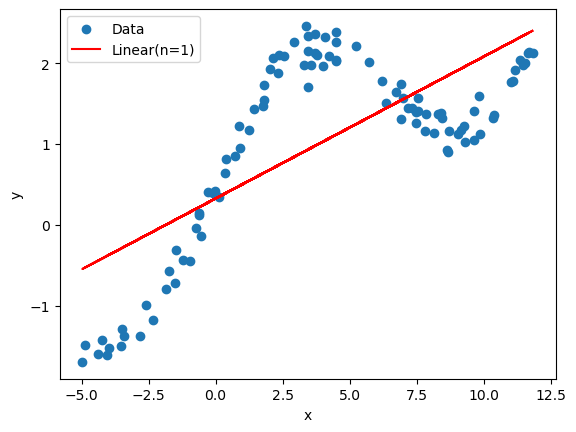

In [10]:
plt.scatter(X, y, label="Data")
plt.plot(X, y1_pred, color="red", label="Linear(n=1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Q2-b

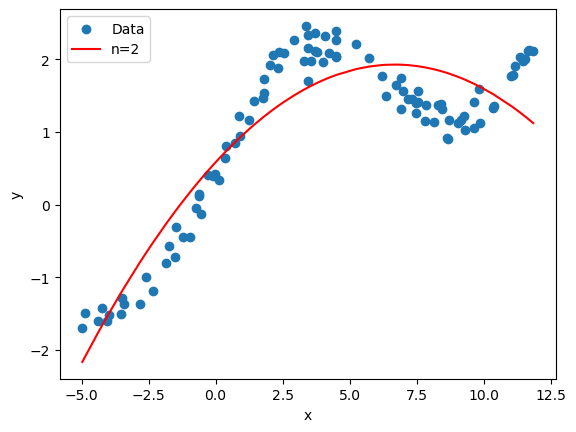

In [11]:
x2 = np.vander(X, N=3, increasing=True)
# print(x2.shape)
# print(x2[:5])

y2_pred = x2 @ polynom(x2,y)
y2_pred = y2_pred.reshape(-1,1)
# print(y2_pred)

plt.figure()
idx = np.argsort(X)
plt.scatter(X, y, label="Data")
plt.plot(X[idx], y2_pred[idx], color="red", label="n=2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

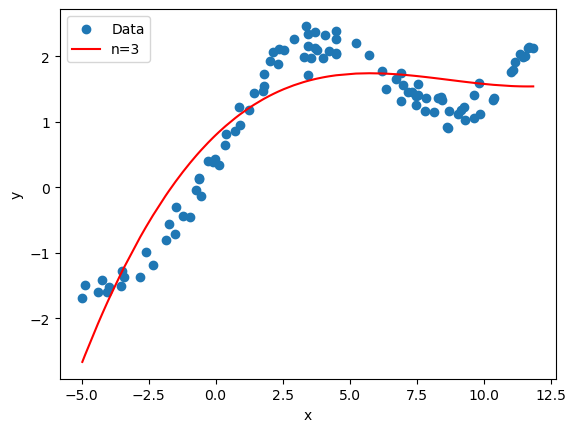

In [12]:
x3 = np.vander(X, N=4, increasing=True)
# print(x3.shape)
# print(x3[:5])

y3_pred = x3 @ polynom(x3,y)
y3_pred = y3_pred.reshape(-1,1)
# print(y3_pred)

plt.figure()
idx = np.argsort(X)
plt.scatter(X, y, label="Data")
plt.plot(X[idx], y3_pred[idx], color="red", label="n=3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

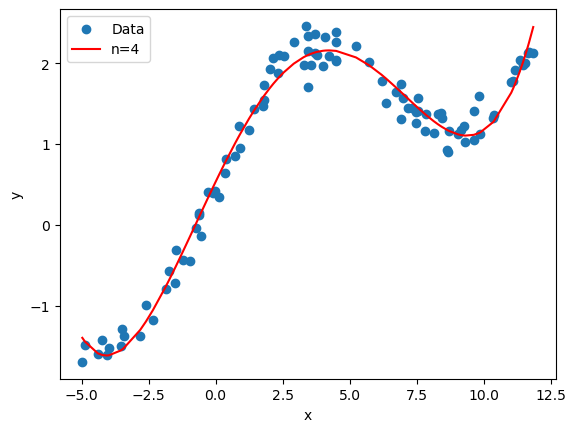

In [13]:
x4 = np.vander(X, N=5, increasing=True)
# print(x4.shape)
# print(x4[:5])

y4_pred = x4 @ polynom(x4,y)
# y4_pred = y4_pred.reshape(-1,1)
#print(y4_pred)

plt.figure()
idx = np.argsort(X)
plt.scatter(X, y, label="Data")
plt.plot(X[idx], y4_pred[idx], color="red", label="n=4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

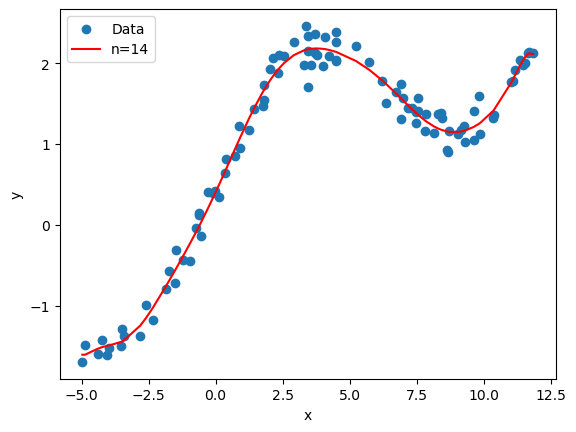

In [14]:
x5 = np.vander(X, N=15, increasing=True)
# print(x5.shape)
# print(x5[:5])

y5_pred = x5 @ polynom(x5,y)
# y5_pred = y5_pred.reshape(-1,1)
#print(y5_pred)

plt.figure()
idx = np.argsort(X)
plt.scatter(X, y, label="Data")
plt.plot(X[idx], y5_pred[idx], color="red", label="n=14")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Q3-a

In [15]:
from sklearn.metrics import mean_squared_error

def ridge_closed_form(X, y, alpha):
    I = np.eye(X.shape[1])
    A = X.T @ X + alpha * I
    B = X.T @ y
    W = np.linalg.inv(A) @ B 
    return W

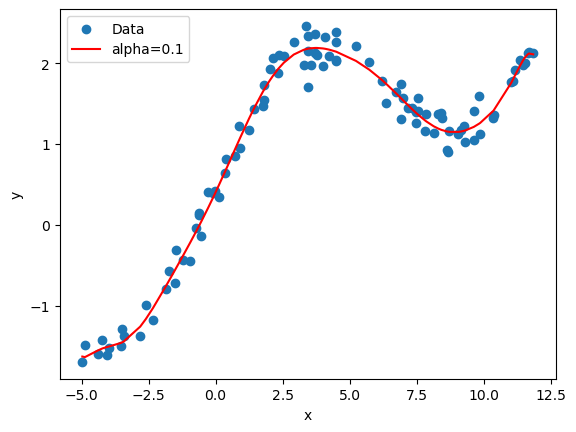

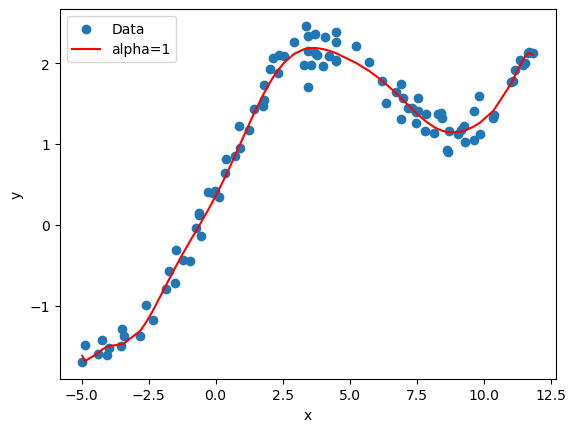

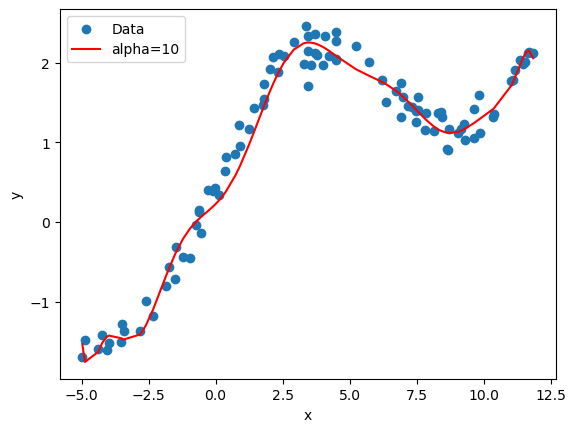

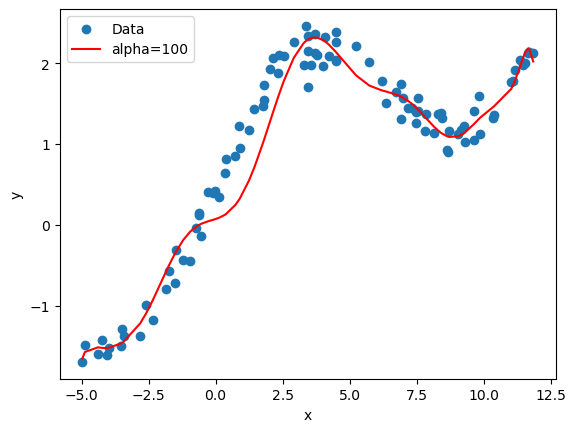

In [16]:
mse = []
alphas = [0.1, 1, 10, 100]

idx = np.argsort(X)

for a in alphas:
    w = ridge_closed_form(x5, y, a)   
    yhat = x5 @ w
    mse.append(mean_squared_error(y,yhat))
    
    plt.figure()
    plt.scatter(X, y, label="Data")
    plt.plot(X[idx], yhat[idx], color="red", label=f"alpha={a}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [17]:
print(mse)

[0.02109602528292815, 0.02204813939568271, 0.03597797418835938, 0.08411441739444481]


Q3-b

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.05815e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


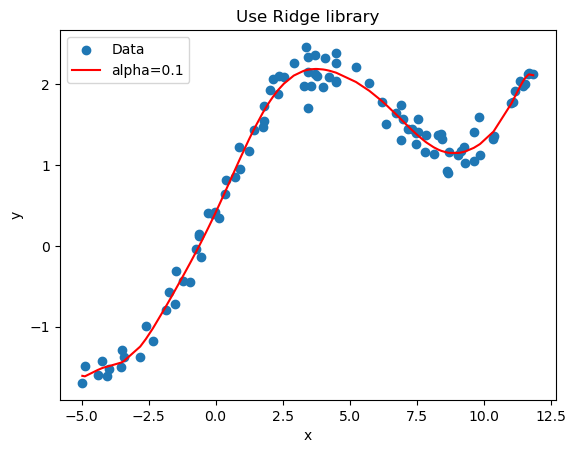

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.20629e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


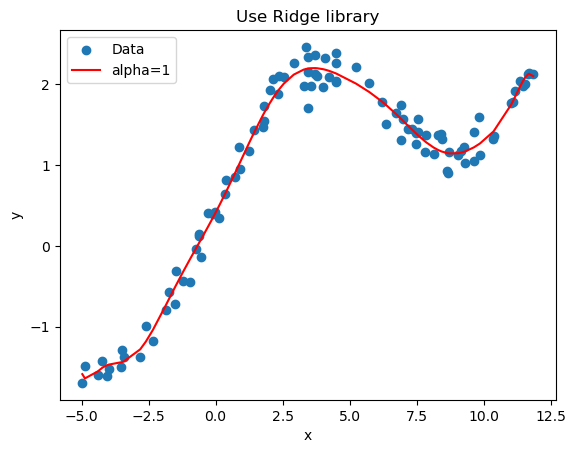

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.71454e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


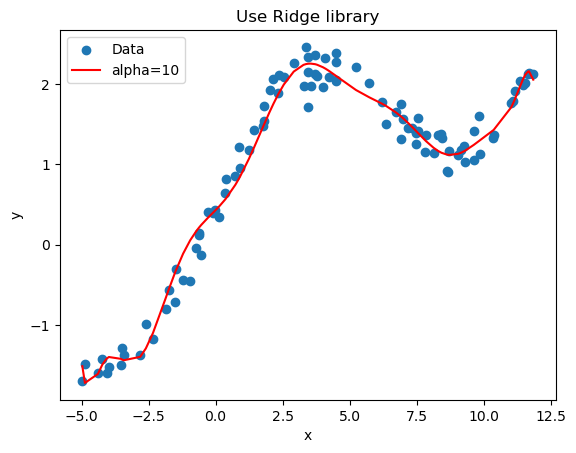

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.85329e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


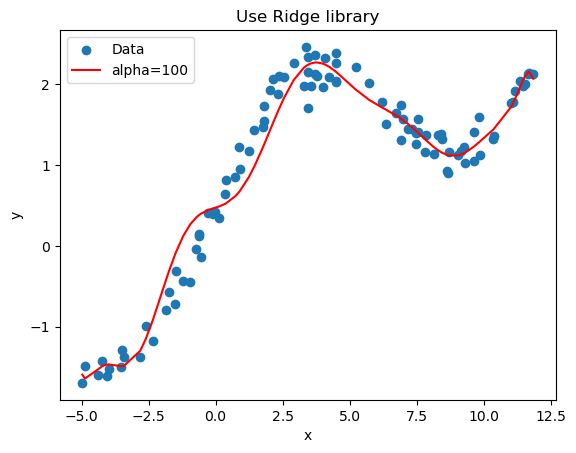

In [19]:
from sklearn.linear_model import Ridge

mse = []
alphas = [0.1, 1, 10, 100]

X = X.reshape(-1,1)
for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=14, include_bias=False),
        Ridge(alpha=a, solver="cholesky"))
    model.fit(X, y)
    yhat = model.predict(X)
    mse.append(mean_squared_error(y,yhat))

    plt.figure()
    plt.title("Use Ridge library")
    plt.scatter(X, y, label="Data")
    plt.plot(X[idx], yhat[idx], color="red", label=f"alpha={a}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()